In [4]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = "/content/ECommerce_consumer behaviour.csv"
data = pd.read_csv(file_path)
data_frame = data.copy()

In [5]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   department_id           int64  
 10  department              object 
 11  product_name            object 
dtypes: float64(1), int64(9), object(2)
memory usage: 184.9+ MB


In [9]:
data_frame['days_since_prior_order']= data_frame['days_since_prior_order'].astype(np.int64)

In [10]:
data_frame.isnull().sum()

,0
order_id,0
user_id,0
order_number,0
order_dow,0
order_hour_of_day,0
days_since_prior_order,0
product_id,0
add_to_cart_order,0
reordered,0
department_id,0


In [11]:
data_frame.dropna(subset="days_since_prior_order", inplace=True)
data_frame.isnull().sum()

,0
order_id,0
user_id,0
order_number,0
order_dow,0
order_hour_of_day,0
days_since_prior_order,0
product_id,0
add_to_cart_order,0
reordered,0
department_id,0


In [15]:
print("\nNumber of duplicate rows:", data_frame.duplicated().sum())


Number of duplicate rows: 0


In [16]:
# Transform 'reordered' column to ensure it is binary (0 or 1)
if 'reordered' in data_frame.columns:
    data_frame['reordered'] = data_frame['reordered'].apply(lambda x: 1 if x == 1 else 0)

In [17]:
print(data_frame.head())

    order_id  user_id  order_number  order_dow  order_hour_of_day  \
22   1201011   147243            14          0                 16   
23   1201011   147243            14          0                 16   
24   1201011   147243            14          0                 16   
25   1201011   147243            14          0                 16   
26   1201011   147243            14          0                 16   

    days_since_prior_order  product_id  add_to_cart_order  reordered  \
22                       3          94                  1          0   
23                       3          83                  2          0   
24                       3          83                  3          1   
25                       3          24                  4          1   
26                       3         120                  5          1   

    department_id  department      product_name  
22              7   beverages               tea  
23              4     produce  fresh vegetables  
24

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
print("\nBasic Statistics:")
print(data_frame.describe())


Basic Statistics:
           order_id       user_id  order_number     order_dow  \
count  1.895159e+06  1.895159e+06  1.895159e+06  1.895159e+06   
mean   1.707264e+06  1.030471e+05  1.821107e+01  2.735071e+00   
std    9.861375e+05  5.946256e+04  1.758028e+01  2.092352e+00   
min    1.000000e+01  2.000000e+00  2.000000e+00  0.000000e+00   
25%    8.526620e+05  5.162500e+04  6.000000e+00  1.000000e+00   
50%    1.705092e+06  1.026170e+05  1.200000e+01  3.000000e+00   
75%    2.560343e+06  1.545240e+05  2.500000e+01  5.000000e+00   
max    3.421080e+06  2.062090e+05  1.000000e+02  6.000000e+00   

       order_hour_of_day  days_since_prior_order    product_id  \
count       1.895159e+06            1.895159e+06  1.895159e+06   
mean        1.342840e+01            1.138603e+01  7.119710e+01   
std         4.243730e+00            8.970980e+00  3.821248e+01   
min         0.000000e+00            0.000000e+00  1.000000e+00   
25%         1.000000e+01            5.000000e+00  3.100000e+01   

<ipython-input-23-3cb7d5fb6290>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='order_dow', data=data_frame, palette='viridis')


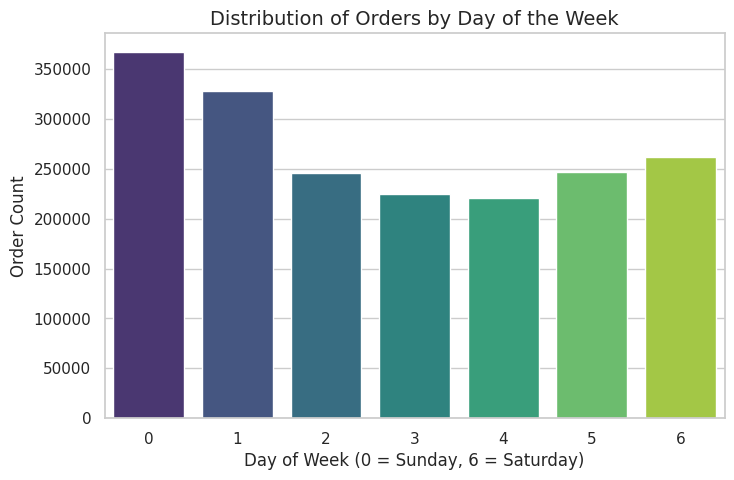

In [23]:
# Distribution of Orders by Day of Week
plt.figure(figsize=(8, 5))
sns.countplot(x='order_dow', data=data_frame, palette='viridis')
plt.title("Distribution of Orders by Day of the Week", fontsize=14)
plt.xlabel("Day of Week (0 = Sunday, 6 = Saturday)", fontsize=12)
plt.ylabel("Order Count", fontsize=12)
plt.show()

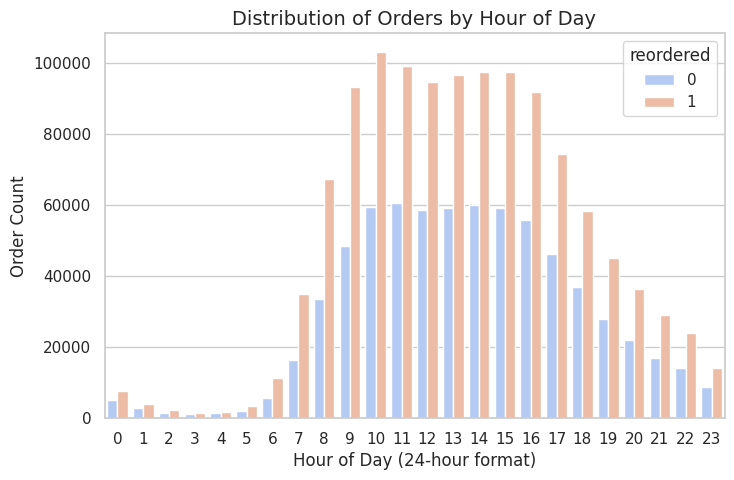

In [25]:
# Distribution of Orders by Hour of Day
plt.figure(figsize=(8, 5))
sns.countplot(x='order_hour_of_day', data=data_frame, palette='coolwarm',hue='reordered')
plt.title("Distribution of Orders by Hour of Day", fontsize=14)
plt.xlabel("Hour of Day (24-hour format)", fontsize=12)
plt.ylabel("Order Count", fontsize=12)
plt.show()

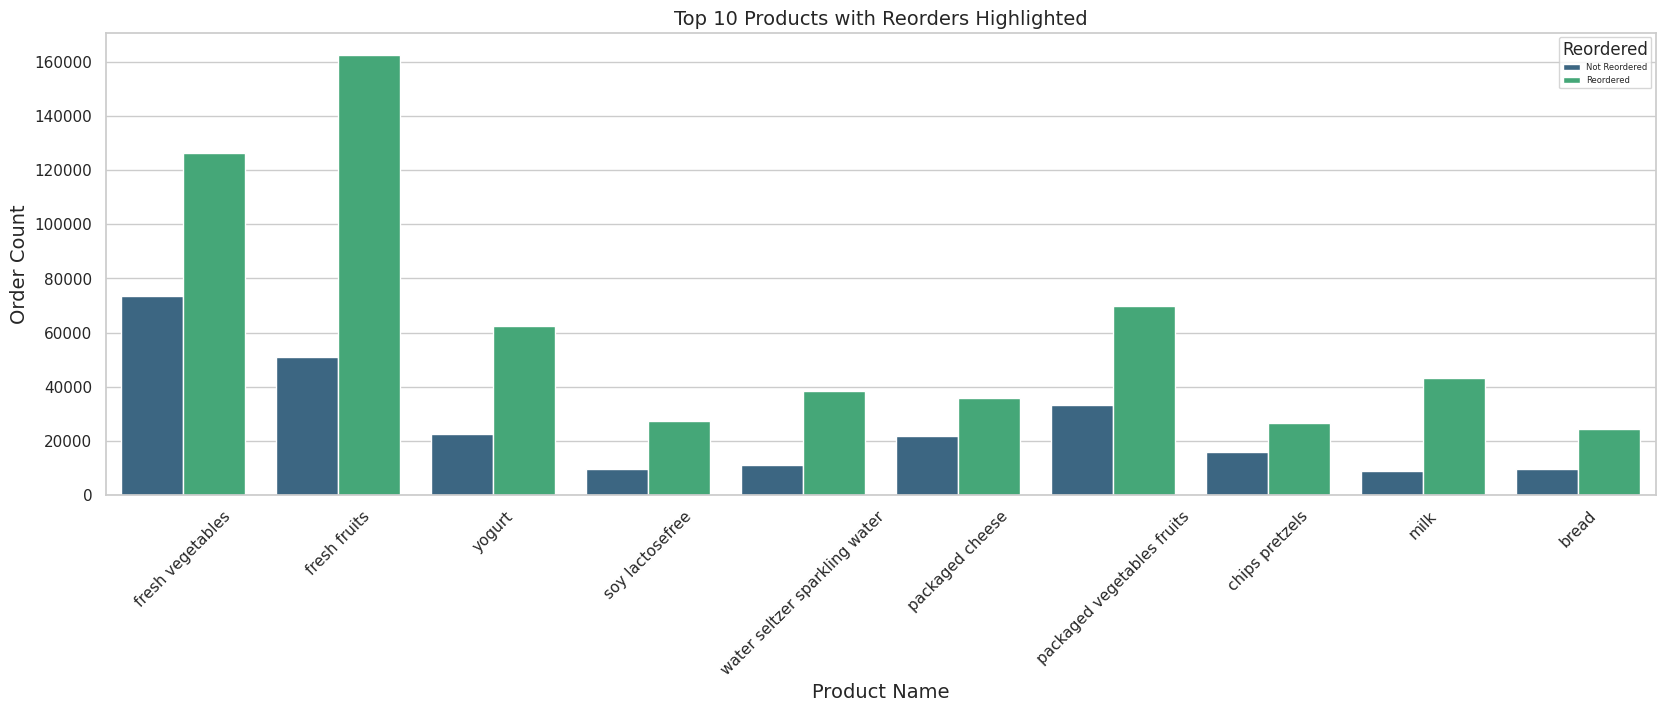

In [35]:
top_products = data_frame['product_id'].value_counts().head(10).index
top_products_data = data_frame[data_frame['product_id'].isin(top_products)]

plt.figure(figsize=(20, 6))
sns.countplot(x='product_name', data=top_products_data, hue='reordered', palette='viridis')
plt.title("Top 10 Products with Reorders Highlighted", fontsize=14)
plt.xlabel("Product Name", fontsize=14)
plt.ylabel("Order Count", fontsize=14)
plt.legend(title="Reordered", labels=["Not Reordered", "Reordered"],fontsize=6)
plt.xticks(rotation=45)
plt.show()


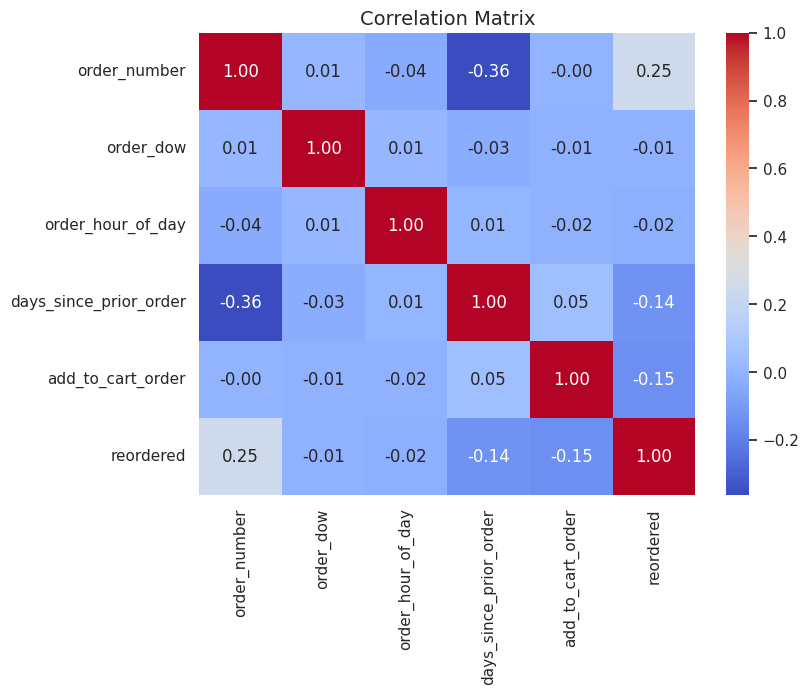

In [37]:
numeric_cols = ['order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order', 'reordered']
correlation_matrix = data[numeric_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix", fontsize=14)
plt.show()

In [38]:
data_frame.to_csv('e_commerce_data_Cleaned.csv', index=False)